#**SkillCraft Technology**: Machine Learning Internship

# **House Price Prediction Using Regression Model(Linear)**

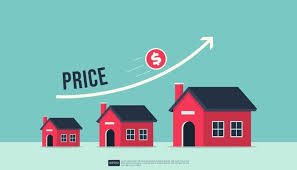

This dataset contains information on 1,460 residential homes and their sale prices. It includes 81 Train data and 80 in Test data variables describing various property features such as lot size, number of rooms, year built, neighborhood, garage details, and more. The target variable is SalePrice, representing the house’s final sale amount. The dataset is commonly used for regression modeling and housing market analysis.



In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error



In [85]:
train_df=pd.read_csv("/content/train.csv")
test_df=pd.read_csv("/content/test.csv")
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [86]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [87]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [88]:
test_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [89]:
print("shape of train data:",train_df.shape)
print("shape of test data:",test_df.shape)

shape of train data: (1460, 81)
shape of test data: (1459, 80)


In [90]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [91]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [92]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [93]:
test_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [94]:
train_df.isnull().mean().sort_values(ascending=False).head(10)

,0
PoolQC,0.995205
MiscFeature,0.963014
Alley,0.937671
Fence,0.807534
MasVnrType,0.597260
FireplaceQu,0.472603
LotFrontage,0.177397
GarageQual,0.055479
GarageFinish,0.055479
GarageType,0.055479


In [95]:
test_df.isnull().mean().sort_values(ascending=False).head(10)

,0
PoolQC,0.997944
MiscFeature,0.965045
Alley,0.926662
Fence,0.801234
MasVnrType,0.612748
FireplaceQu,0.500343
LotFrontage,0.155586
GarageYrBlt,0.053461
GarageCond,0.053461
GarageFinish,0.053461


In [96]:
threshold = 0.5  # 50%
for col in train_df.columns:
    if train_df[col].isnull().mean() > threshold:
        train_df.drop(col, axis=1, inplace=True)
        if col in test_df.columns:
            test_df.drop(col, axis=1, inplace=True)

In [97]:
train_df.duplicated().sum()

np.int64(0)

In [98]:
test_df.duplicated().sum() # no duplicates in both data's

np.int64(0)

In [99]:
print("train data:",train_df.shape)
print("test data:",test_df.shape) # unwanted columns are removed the value  which is greater than 50%

train data: (1460, 76)
test data: (1459, 75)


In [100]:
# Selecting common columns in train and test data.

# Get the intersection (common columns) between train and test
common_columns = train_df.columns.intersection(test_df.columns)

# Keep only those columns in both dataframes
train_common = train_df[common_columns].copy()
test_common = test_df[common_columns].copy()

# Saved target variable as y train.
y_train = train_df["SalePrice"]

In [101]:
# Impute missing values
for col in train_common.columns:
    if train_common[col].dtype in ['int64', 'float64']:
        # Numerical: use median
        median_val = train_common[col].median()
        train_common[col].fillna(median_val, inplace=True)
        test_common[col].fillna(median_val, inplace=True)
    else:
        # Categorical: use mode
        mode_val = train_common[col].mode()[0]
        train_common[col].fillna(mode_val, inplace=True)
        test_common[col].fillna(mode_val, inplace=True)


In [102]:
train_common.isnull().mean()

,0
Id,0.0
MSSubClass,0.0
MSZoning,0.0
LotFrontage,0.0
LotArea,0.0
...,...
MiscVal,0.0
MoSold,0.0
YrSold,0.0
SaleType,0.0


In [103]:
test_common.isnull().mean()

,0
Id,0.0
MSSubClass,0.0
MSZoning,0.0
LotFrontage,0.0
LotArea,0.0
...,...
MiscVal,0.0
MoSold,0.0
YrSold,0.0
SaleType,0.0


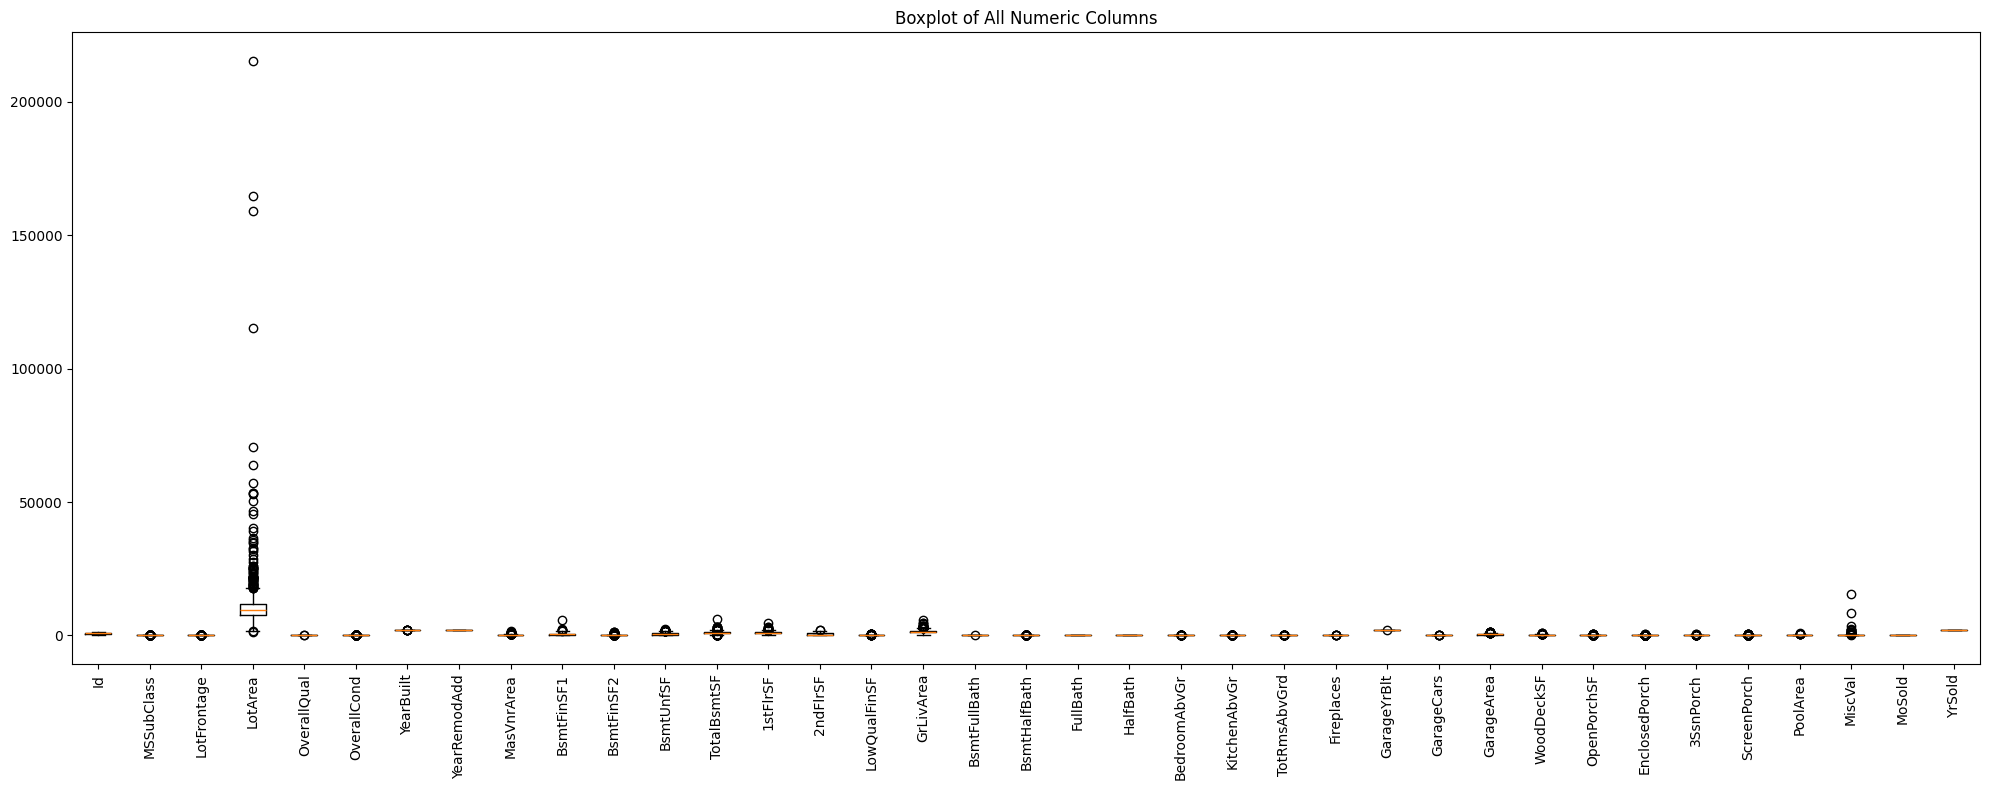

In [104]:
# filter numeric columns
numeric_cols = train_common.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(20, 8))
plt.boxplot(numeric_cols.values, labels=numeric_cols.columns, vert=True)
plt.xticks(rotation=90)
plt.title("Boxplot of All Numeric Columns")
plt.tight_layout()
plt.show()

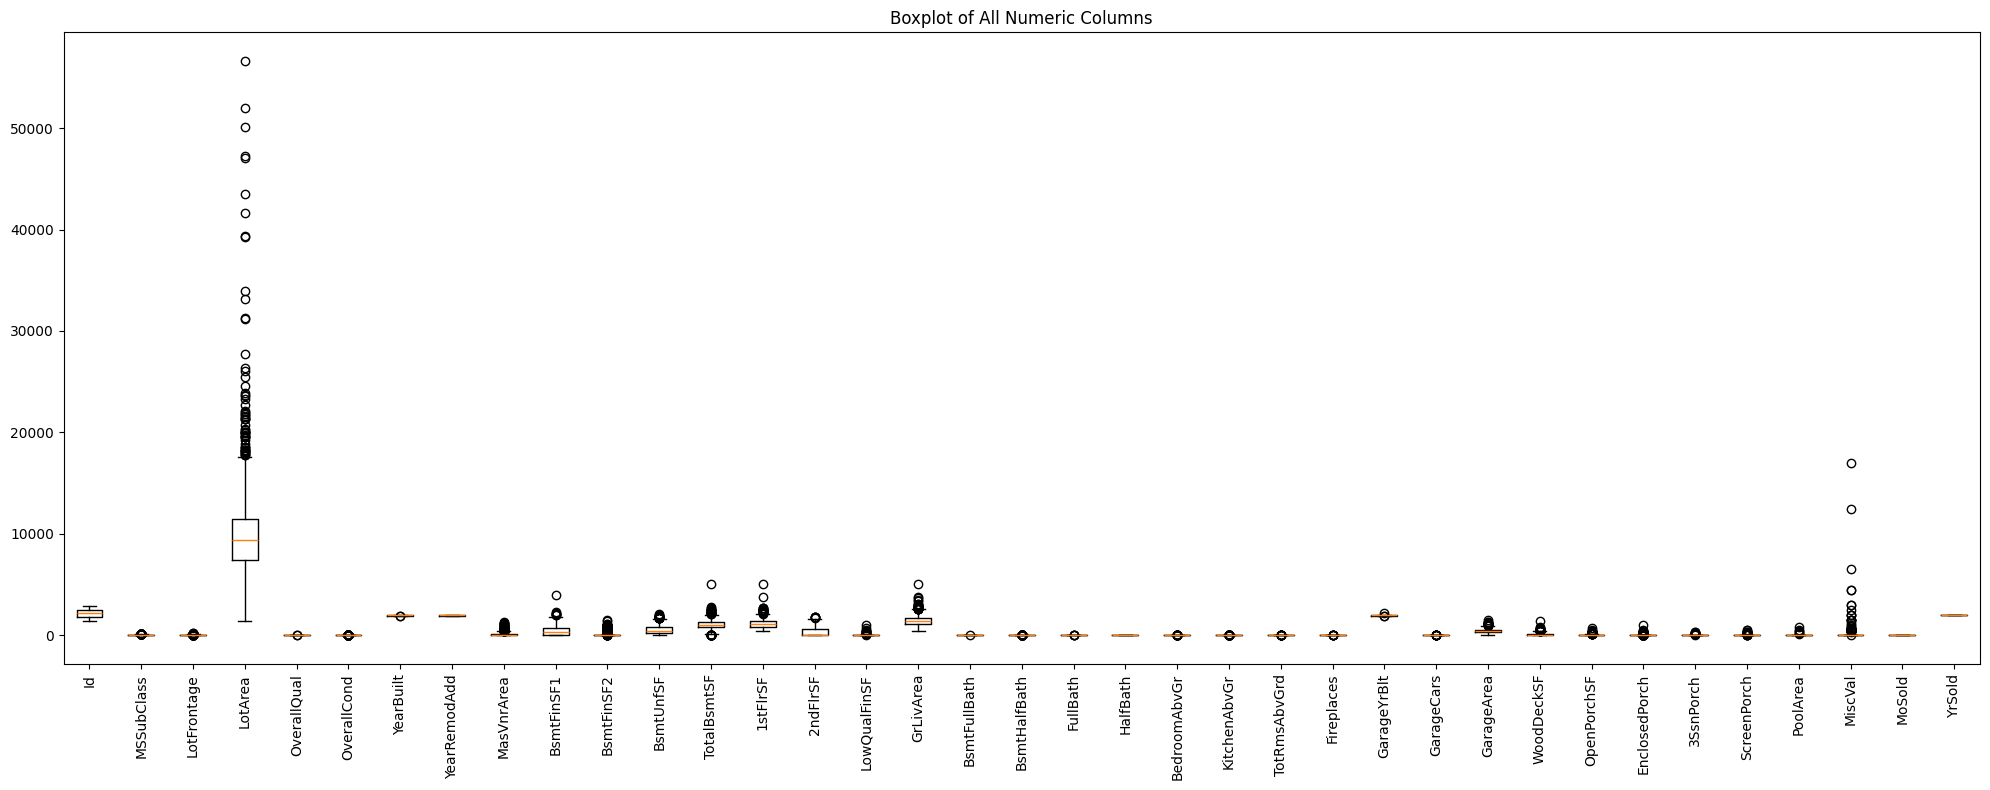

In [105]:
# filter numeric columns
numeric_cols = test_common.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(20, 8))
plt.boxplot(numeric_cols.values, labels=numeric_cols.columns, vert=True)
plt.xticks(rotation=90)
plt.title("Boxplot of All Numeric Columns")
plt.tight_layout()
plt.show()

There are outliers present in some columns

In [106]:
# Function to remove outliers using IQR
def cap_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower, lower,
                           np.where(df[col] > upper, upper, df[col]))
    return df

# Apply on both datasets
train_df = cap_outliers(train_common, numeric_cols)
test_df = cap_outliers(test_common, numeric_cols)# outliers are removed by using IQR method



# **Handling Skewness**

In [107]:
train_df.skew(numeric_only=True).sort_values(ascending=False)

,0
MasVnrArea,1.287759
OpenPorchSF,1.136301
WoodDeckSF,1.083673
MSSubClass,1.019624
2ndFlrSF,0.800109
BsmtUnfSF,0.796931
BsmtFinSF1,0.739877
HalfBath,0.675897
1stFlrSF,0.664134
GrLivArea,0.593556


In [108]:
test_df.skew(numeric_only=True).sort_values(ascending=False)

,0
MasVnrArea,1.328953
OpenPorchSF,1.188823
WoodDeckSF,1.104194
MSSubClass,0.973321
2ndFlrSF,0.893148
BsmtFinSF1,0.844477
BsmtUnfSF,0.841662
HalfBath,0.714728
Fireplaces,0.677482
GrLivArea,0.659761


In [109]:
skewness = train_df.select_dtypes("number").skew()

# Apply transformations
for col in skewness.index:
    if skewness[col] > 0.5:  # Positively skewed
        train_df[col] = np.log1p(train_df[col])
        test_df[col] = np.log1p(test_df[col])
    elif skewness[col] < -0.5:  # Negatively skewed
        train_df[col] = np.square(train_df[col])
        test_df[col] = np.square(test_df[col])

print("Transformations applied to:", skewness[abs(skewness) > 0.5].index.tolist())


Transformations applied to: ['MSSubClass', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'HalfBath', 'Fireplaces', 'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF']


In [110]:
train_df.skew(numeric_only=True).sort_values(ascending=False).head()

,0
HalfBath,0.566168
MasVnrArea,0.480981
BsmtFullBath,0.414154
TotRmsAbvGrd,0.366919
2ndFlrSF,0.289583


# Skewness handled and transformed for data by using log and square transformation for positive and negative values

In [111]:
constant_cols_train = [col for col in train_df.columns if train_df[col].nunique() == 1]
print("Constant columns in train:", constant_cols_train)

# For test
constant_cols_test = [col for col in test_df.columns if test_df[col].nunique() == 1]
print("Constant columns in test:", constant_cols_test)

# drop the columns
train_df.drop(columns=constant_cols_train, inplace=True)
test_df.drop(columns=constant_cols_test, inplace=True)

Constant columns in train: ['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
Constant columns in test: ['Utilities', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [112]:
# Shape after dropping constant columns.
print("train shape:",train_df.shape)
print("test shape :",test_df.shape)

train shape: (1460, 66)
test shape : (1459, 65)


In [113]:
# Aligning the mismatched number of columns in train and test data.
common_columns = train_df.columns.intersection(test_df.columns)

# Keep only those columns in both dataframes
train_df = train_df[common_columns].copy()
test_df = test_df[common_columns].copy()


print("train shape:",train_df.shape)
print("test shape :",test_df.shape)


train shape: (1460, 65)
test shape : (1459, 65)


# **EDA:Exploratoty Data Analysis**

In [114]:
df = train_df.copy()
df["SalePrice"]= y_train.copy()
df


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,4.110874,RL,65.0,8450.0,Pave,Reg,Lvl,Inside,Gtl,...,TA,TA,Y,0.000000,4.127134,2.0,2008.0,WD,Normal,208500
1,2.0,3.044522,RL,80.0,9600.0,Pave,Reg,Lvl,FR2,Gtl,...,TA,TA,Y,5.700444,0.000000,5.0,2007.0,WD,Normal,181500
2,3.0,4.110874,RL,68.0,11250.0,Pave,IR1,Lvl,Inside,Gtl,...,TA,TA,Y,0.000000,3.761200,9.0,2008.0,WD,Normal,223500
3,4.0,4.262680,RL,60.0,9550.0,Pave,IR1,Lvl,Corner,Gtl,...,TA,TA,Y,0.000000,3.583519,2.0,2006.0,WD,Abnorml,140000
4,5.0,4.110874,RL,84.0,14260.0,Pave,IR1,Lvl,FR2,Gtl,...,TA,TA,Y,5.262690,4.442651,12.0,2008.0,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,4.110874,RL,62.0,7917.0,Pave,Reg,Lvl,Inside,Gtl,...,TA,TA,Y,0.000000,3.713572,8.0,2007.0,WD,Normal,175000
1456,1457.0,3.044522,RL,85.0,13175.0,Pave,Reg,Lvl,Inside,Gtl,...,TA,TA,Y,5.857933,0.000000,2.0,2010.0,WD,Normal,210000
1457,1458.0,4.262680,RL,66.0,9042.0,Pave,Reg,Lvl,Inside,Gtl,...,TA,TA,Y,0.000000,4.110874,5.0,2010.0,WD,Normal,266500
1458,1459.0,3.044522,RL,68.0,9717.0,Pave,Reg,Lvl,Inside,Gtl,...,TA,TA,Y,5.905362,0.000000,4.0,2010.0,WD,Normal,142125


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   float64
 16  OverallCond    1460 non-null   float64
 17  YearBuilt      1460 non-null   float64
 18  YearRemo

# **Target Variable Distribution**

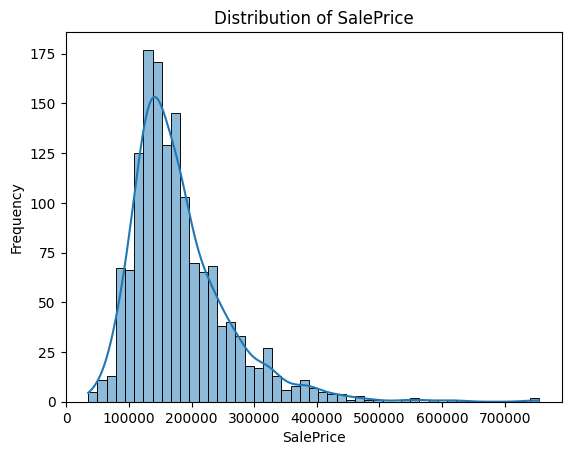

In [116]:
sns.histplot(df["SalePrice"], kde=True)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

* most houses have lower sale prices, and fewer houses are sold at much higher prices.
* peak of the distribution occurs between $100,000 and $200,000, which appears to be the most common sale price range.


# **Average sale price by material quality**

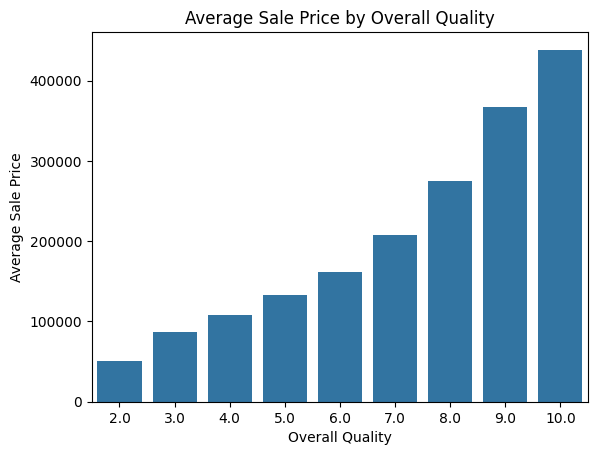

In [117]:
avg_price = df.groupby('OverallQual')['SalePrice'].mean().reset_index()

sns.barplot(x='OverallQual', y='SalePrice', data=avg_price)
plt.title('Average Sale Price by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Average Sale Price')
plt.show()


* Overall Quality increases, the Average Sale Price increases significantly.

* This indicates that higher-quality houses are consistently associated with higher prices.

* there is steeper rise in prices as we move from quality ratings of 7 and above.
This suggests premium pricing for top-tier properties, possibly due to better materials, finishes, or neighborhood effects.



In [118]:
roof_price = df.groupby("RoofStyle")["SalePrice"].agg(['count','mean']).reset_index()
roof_price

,RoofStyle,count,mean
0,Flat,13,194690.000000
1,Gable,1141,171483.956179
2,Gambrel,11,148909.090909
3,Hip,286,218876.933566
4,Mansard,7,180568.428571
5,Shed,2,225000.000000


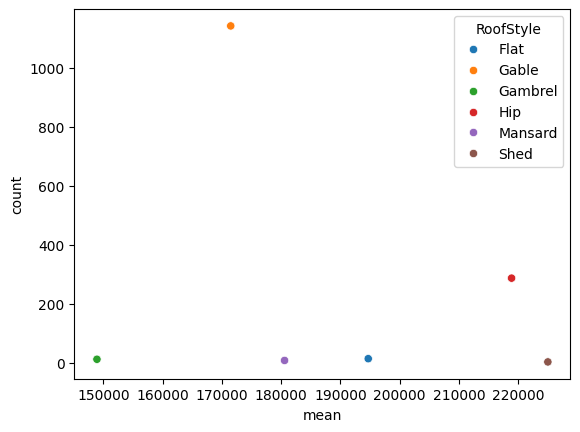

In [119]:
sns.scatterplot(roof_price,x="mean",y='count',hue ="RoofStyle")
plt.show()

* Gable roofs are most common with over 1100 houses.
* Hip roofs are the second most frequent
* Shed and Flat Roofs Are Rare but Expensive

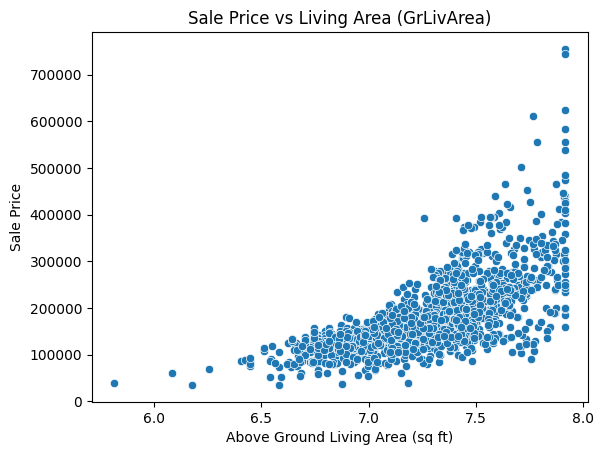

In [120]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('Sale Price vs Living Area (GrLivArea)')
plt.xlabel('Above Ground Living Area (sq ft)')
plt.ylabel('Sale Price')
plt.show()


* GrLivArea increases, Sale Price also increases.
* There is a general upward trend, but prices vary even for homes of the same size.

FullBath
0.0    165200.888889
1.0    134751.440000
2.0    213009.825521
3.0    347822.909091
Name: SalePrice, dtype: float64


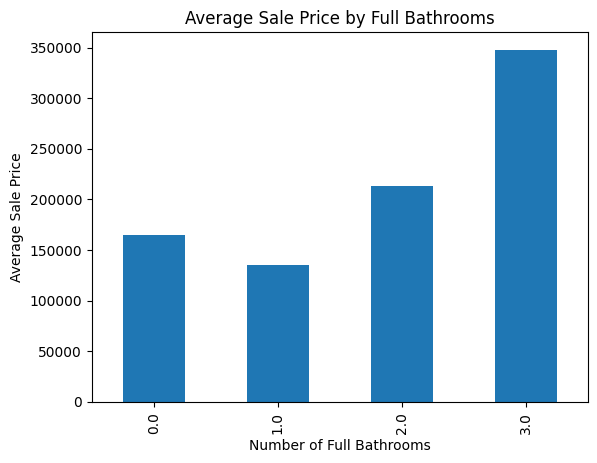

In [121]:
bath_avg_price = df.groupby('FullBath')['SalePrice'].mean()
print(bath_avg_price)

bath_avg_price.plot(kind='bar', title='Average Sale Price by Full Bathrooms')
plt.ylabel("Average Sale Price")
plt.xlabel("Number of Full Bathrooms")
plt.show()

* Homes with more full bathrooms tend to sell for more money.
* 3-bathroom homes have the highest average price by far.

* 1 bathroom homes sell for the lowest

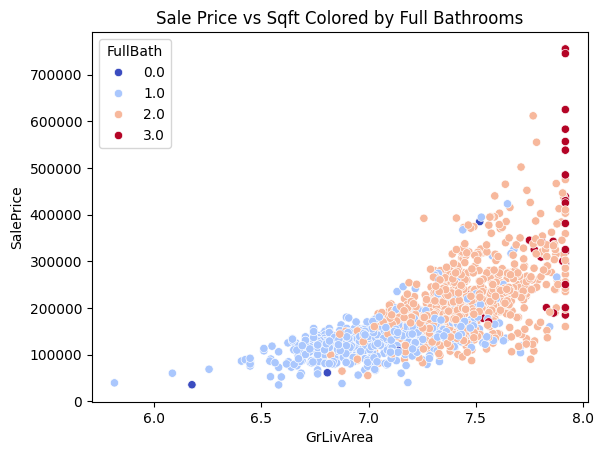

In [122]:
sns.scatterplot(x='GrLivArea', y='SalePrice', hue='FullBath', data=df, palette='coolwarm')
plt.title('Sale Price vs Sqft Colored by Full Bathrooms')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend(title='FullBath')
plt.show()

* More full bathrooms are strongly associated with higher price and larger homes.
* Bathrooms are a key indicator of home value, not just size.
* 3 bathroom are more expensive and larger

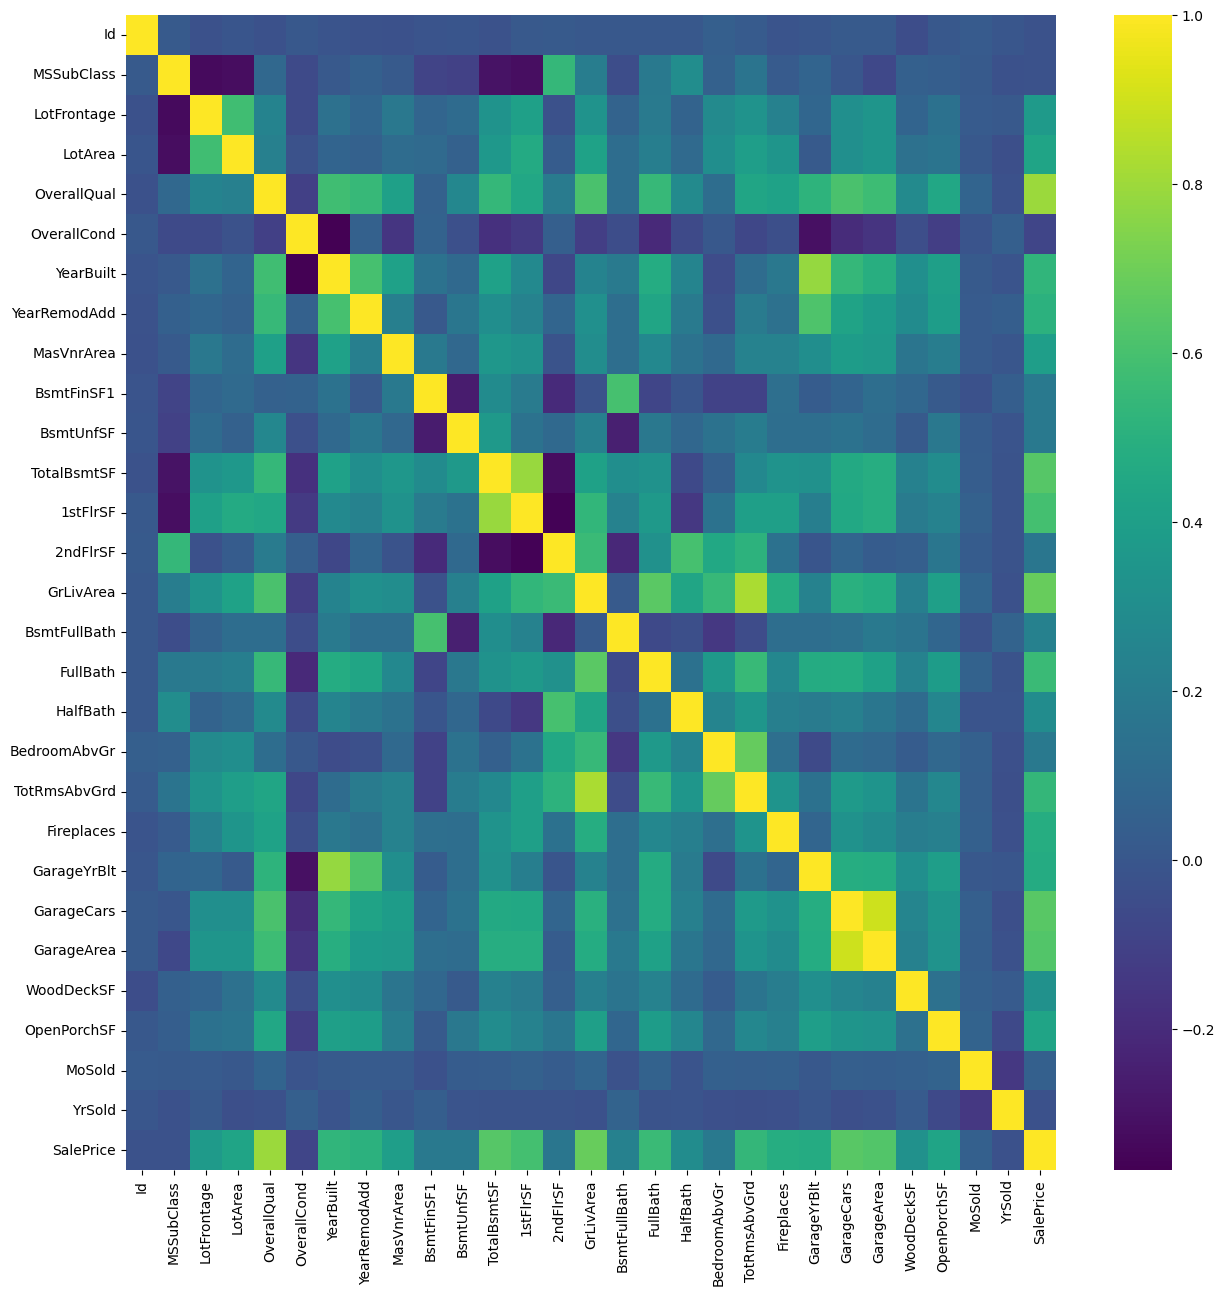

In [123]:
numerical_col_df= df.select_dtypes("number")
plt.figure(figsize=(15,15))
sns.heatmap(numerical_col_df.corr(),cmap="viridis")
plt.show()

* There is a strong correlation between quality and price ,where quality increases price also increase
* There is good correlatiob between GarageCars and GarageArea
* There is a multicolinearity.

# **Feature Engineering**

In [124]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   float64
 16  OverallCond    1460 non-null   float64
 17  YearBuilt      1460 non-null   float64
 18  YearRemo

In [125]:
X_train = train_df.copy()
X_test = test_df.copy()
print("Shape of x train :",X_train.shape)
print("Shape of y train :",y_train.shape)
print("Shape of x test :",X_test.shape)

Shape of x train : (1460, 65)
Shape of y train : (1460,)
Shape of x test : (1459, 65)


In [126]:
X_train.drop(columns=['Id'], inplace=True)
X_test.drop(columns=['Id'], inplace=True)

# **Feature Encoding**

In [127]:
cat_cols = train_df.select_dtypes(include='object').columns.tolist()

X_train = pd.get_dummies(train_df, columns=cat_cols, drop_first=True,dtype='int')
X_test = pd.get_dummies(test_df, columns=cat_cols, drop_first=True,dtype='int')

In [128]:
X_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,4.110874,65.0,8450.0,7.0,1.791759,4012009.0,4012009.0,5.283204,6.561031,...,0,0,0,0,1,0,0,0,1,0
1,2.0,3.044522,80.0,9600.0,6.0,2.140066,3904576.0,3904576.0,0.000000,6.886532,...,0,0,0,0,1,0,0,0,1,0
2,3.0,4.110874,68.0,11250.0,7.0,1.791759,4004001.0,4008004.0,5.093750,6.188264,...,0,0,0,0,1,0,0,0,1,0
3,4.0,4.262680,60.0,9550.0,7.0,1.791759,3667225.0,3880900.0,0.000000,5.379897,...,0,0,0,0,1,0,0,0,0,0
4,5.0,4.110874,84.0,14260.0,8.0,1.791759,4000000.0,4000000.0,5.860786,6.486161,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,4.110874,62.0,7917.0,6.0,1.791759,3996001.0,4000000.0,0.000000,0.000000,...,0,0,0,0,1,0,0,0,1,0
1456,1457.0,3.044522,85.0,13175.0,6.0,1.945910,3912484.0,3952144.0,4.787492,6.673298,...,0,0,0,0,1,0,0,0,1,0
1457,1458.0,4.262680,66.0,9042.0,7.0,2.140066,3767481.0,4024036.0,0.000000,5.620401,...,0,0,0,0,1,0,0,0,1,0
1458,1459.0,3.044522,68.0,9717.0,5.0,1.945910,3802500.0,3984016.0,0.000000,3.912023,...,0,0,0,0,1,0,0,0,1,0


In [129]:
X_test

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461.0,3.044522,80.0,11622.00,5.0,1.945910,3845521.0,3845521.0,0.000000,6.150603,...,0,0,0,0,1,0,0,0,1,0
1,1462.0,3.044522,81.0,14267.00,6.0,1.945910,3833764.0,3833764.0,4.691348,6.828712,...,0,0,0,0,1,0,0,0,1,0
2,1463.0,4.110874,74.0,13830.00,5.0,1.791759,3988009.0,3992004.0,0.000000,6.674561,...,0,0,0,0,1,0,0,0,1,0
3,1464.0,4.110874,78.0,9978.00,6.0,1.945910,3992004.0,3992004.0,3.044522,6.401917,...,0,0,0,0,1,0,0,0,1,0
4,1465.0,4.795791,43.0,5005.00,8.0,1.791759,3968064.0,3968064.0,0.000000,5.575949,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915.0,4.983607,33.0,1936.00,4.0,2.079442,3880900.0,3880900.0,0.000000,0.000000,...,0,0,0,0,1,0,0,0,1,0
1455,2916.0,4.983607,33.0,1894.00,4.0,1.791759,3880900.0,3880900.0,0.000000,5.533389,...,0,0,0,0,1,0,0,0,0,0
1456,2917.0,3.044522,105.0,17707.25,5.0,2.079442,3841600.0,3984016.0,0.000000,7.110696,...,0,0,0,0,1,0,0,0,0,0
1457,2918.0,4.454347,62.0,10441.00,5.0,1.791759,3968064.0,3968064.0,0.000000,5.823046,...,0,0,0,0,1,0,0,0,1,0


 there is a mismatch in columns after one-hot need to align both the columns

In [130]:
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# **Feature Selecion**

In [131]:
# Feature selection

# Initialize and apply SelectKBest (selecting 50 feature)
selector = SelectKBest(score_func=f_regression,k=50)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)  # Apply same transformation on test data

# Get selected features and their scores
selected_features = X_train.columns[selector.get_support()]
selected_features_score = pd.DataFrame({
    "Feature": selected_features,
    "Score": selector.scores_[selector.get_support()]
})

# Sort features by score in descending order
selected_features_score = selected_features_score.sort_values(by="Score", ascending=False)

# Display selected features with scores
print(selected_features_score)

                  Feature        Score
2             OverallQual  2453.038335
8               GrLivArea  1284.010923
15             GarageCars  1033.195352
6             TotalBsmtSF   995.585538
16             GarageArea   960.207172
7                1stFlrSF   777.711596
29           ExterQual_TA   774.677019
10               FullBath   668.430296
12           TotRmsAbvGrd   587.935833
3               YearBuilt   558.791093
41         KitchenQual_TA   538.358524
45       GarageFinish_Unf   523.246497
4            YearRemodAdd   505.376311
33            BsmtQual_TA   482.240464
31       Foundation_PConc   480.156815
13             Fireplaces   437.432643
14            GarageYrBlt   410.372307
28           ExterQual_Gd   375.329470
36       BsmtFinType1_GLQ   339.503144
1                 LotArea   334.940368
18            OpenPorchSF   334.124959
23   Neighborhood_NridgHt   281.282911
5              MasVnrArea   269.938244
0             LotFrontage   233.500632
47           SaleType_New

In [132]:
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train_selected)
X_test_scaled=scaler.transform(X_test_selected)

# **Model Building**

In [133]:
model =LinearRegression()

model.fit(X_train_scaled, y_train)

#  Make predictions on the test set
y_pred_train = model.predict(X_train_scaled)
y_pred_test=model.predict(X_test_scaled)

# Evaluate the model


# R-squared (R2 score)
r2 = r2_score(y_train, y_pred_train)
print(f"R-squared: {r2}")

R-squared: 0.8482840523595064


In [134]:
y_pred_test

array([121044.83715205, 166900.97886782, 180345.72722062, ...,
       179222.81976365, 115215.62044852, 211520.84847847])

In [135]:
# Saved the predicted values as submission.
submission = pd.DataFrame({
    'PredictedValue': y_pred_test
})
submission.to_csv("submission.csv", index=False)

In [136]:
submission

,PredictedValue
0,121044.837152
1,166900.978868
2,180345.727221
3,192827.081023
4,183663.047627
...,...
1454,66920.448822
1455,57249.028737
1456,179222.819764
1457,115215.620449


# **Conclusion**

This project successfully developed a linear regression model to predict house prices using the House price dataset. Key preprocessing steps included handling missing values, removing outliers, treating skewness, and encoding categorical variables. Feature selection was performed using the SelectKBest method, identifying important predictors like OverallQual, GrLivArea, and GarageCars. After scaling the selected features, the model was trained and showed reasonable performance. The project demonstrated a complete machine learning pipeline and highlighted that quality, size, and condition are strong indicators of house price. Future improvements could include trying ensemble models and advanced validation techniques to boost accuracy.